## Business Case:- Texas Salary Prediction

* The Texas Salary Prediction business case focuses on leveraging machine learning to estimate salaries based on various factors such as education, experience, industry, job role, and location within Texas. This solution benefits businesses, job seekers, and policymakers by providing insights into salary trends and helping organizations make competitive compensation decisions. Companies can use salary predictions to optimize hiring strategies, attract top talent, and ensure fair pay practices, while job seekers can evaluate expected earnings based on their skills and career paths.

* The model can also assist HR departments in budgeting and workforce planning. By analyzing historical salary data, industry trends, and economic factors, businesses can enhance decision-making and improve employee retention. Furthermore, integrating real-time salary predictions into job portals can enhance user experience by providing transparency in salary expectations. This data-driven approach ultimately contributes to a more efficient labor market in Texas, fostering economic growth and fair compensation practices.

#### Domain Name:-  Finance & Business Intelligence

## Domain Analysis

* Domain Analysis is the process of studying and understanding a specific area of interest (domain) to identify key concepts, relationships, and patterns relevant to solving a problem. It helps in designing solutions that align with real-world requirements

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [291]:
pd.set_option("display.max_columns",None)

In [292]:
data = pd.read_csv("salary.csv")
data

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


In [172]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [173]:
data.drop(['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],axis=1,inplace=True)

In [174]:
data.isnull().sum()

AGENCY          0
AGENCY NAME     0
LAST NAME       0
FIRST NAME      0
MI              0
CLASS CODE      0
CLASS TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
EMPLOY DATE     0
HRLY RATE       0
HRS PER WK      0
MONTHLY         0
ANNUAL          0
STATE NUMBER    0
dtype: int64

### Attribute Information:

**1. AGENCY –**  Unique code representing the government agency or department.

**2. AGENCY NAME –**  Name of the government agency or organization.

**3. LAST NAME –**  Employee’s last name (surname).

**4. FIRST NAME –**  Employee’s first name.

**5. MI (Middle Initial) –**  First letter of the employee’s middle name (if available).

**6. CLASS CODE –**  A unique identifier for the employee’s job classification.

**7. CLASS TITLE –**  The job title or designation of the employee (e.g., "Software Engineer").

**8. ETHNICITY –**  Employee’s racial or ethnic background (e.g., White, Black, Asian, Hispanic).

**9. GENDER –**  Employee’s gender (e.g., Male, Female, Non-binary).

**10. STATUS –**  Employment status (e.g., Full-time, Part-time, Temporary).

**11. EMPLOY DATE –**  The date when the employee was hired.

**12. HRLY RATE –**  Hourly wage or salary of the employee.

**13. HRS PER WK –**  Number of hours worked per week.

**14. MONTHLY –**  Monthly salary of the employee (sometimes derived from hourly rate).

**15. ANNUAL –**  Annual salary of the employee (key target variable for salary prediction).

**16. STATE NUMBER –**  A unique identifier assigned to state employees for tracking.

## Basic Check

* Basic checks in data analysis are essential to ensure data quality and consistency before proceeding with modeling. The first step is to examine the dataset's structure and size using functions like df.shape to determine the number of rows and columns. Checking data types with df.info() helps confirm that numerical values are correctly stored as integers or floats and that date columns are in the correct format. Identifying missing values using df.isnull().sum() is crucial, as missing data can impact model performance, requiring imputation or removal strategies. Duplicate records can skew analysis, so checking for them using df.duplicated().sum() and removing them if necessary ensures data integrity. Statistical summaries obtained using df.describe() provide insights into key measures like mean, minimum, and maximum values, helping detect anomalies or outliers. For categorical data, analyzing unique values with df['column_name'].unique() and their frequency distribution with df['column_name'].value_counts() aids in understanding class distributions. These basic checks are fundamental steps in data preprocessing, ensuring a clean and well-structured dataset for further analysis.

In [175]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030


In [176]:
data.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00,40.0,2899.00,34788.00,770781
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00,40.0,5500.00,66000.00,847431
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93,20.0,1120.60,13447.20,34266
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00,40.0,5744.16,68929.92,123490
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,02/16/12,11.74,20.0,1017.46,12209.52,103583


In [177]:
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06


In [178]:
data.describe(include="O")

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481
unique,113,38675,23559,27,1481,1422,6,2,11,6295
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AGENCY        149481 non-null  int64  
 1   AGENCY NAME   149481 non-null  object 
 2   LAST NAME     149481 non-null  object 
 3   FIRST NAME    149481 non-null  object 
 4   MI            149481 non-null  object 
 5   CLASS CODE    149481 non-null  object 
 6   CLASS TITLE   149481 non-null  object 
 7   ETHNICITY     149481 non-null  object 
 8   GENDER        149481 non-null  object 
 9   STATUS        149481 non-null  object 
 10  EMPLOY DATE   149481 non-null  object 
 11  HRLY RATE     149481 non-null  float64
 12  HRS PER WK    149481 non-null  float64
 13  MONTHLY       149481 non-null  float64
 14  ANNUAL        149481 non-null  float64
 15  STATE NUMBER  149481 non-null  int64  
dtypes: float64(4), int64(2), object(10)
memory usage: 18.2+ MB


## EDA:- Exploratory Data Analysis

* Exploratory Data Analysis (EDA) is the process of analyzing and summarizing datasets to uncover patterns, detect anomalies, and gain insights before applying machine learning models. It involves both statistical and graphical techniques to understand the data's structure, relationships, and distributions. The first step in EDA is understanding the dataset by checking its shape, data types, missing values, and summary statistics. Data visualization plays a crucial role in EDA, using histograms, box plots, scatter plots, and correlation matrices to identify trends, outliers, and dependencies between variables. For categorical variables, bar charts and count plots help assess frequency distributions, while for numerical data, histograms and density plots reveal distributions. Correlation analysis using a heatmap helps identify relationships between features, which can guide feature selection. EDA also includes handling missing values, detecting and treating outliers, and transforming data if necessary. The insights gained from EDA help in making informed decisions about feature engineering, model selection, and data preprocessing, ensuring better model performance and interpretability.

#### 1. Univariant Analysis

* Univariate analysis is the process of analyzing a single variable to understand its distribution, central tendency, and variability. It is the simplest form of data analysis, as it focuses on only one variable at a time without considering relationships with other variables. This analysis helps in identifying patterns, detecting outliers, and understanding the overall structure of the data. For numerical variables, common statistical measures include mean, median, mode, standard deviation, variance, and range, which provide insights into the data’s spread and central values. Visualization techniques such as histograms, box plots, and density plots help in understanding the distribution of the variable, whether it is normal, skewed, or has outliers. For categorical variables, frequency tables, bar charts, and pie charts are commonly used to analyze the distribution of different categories. Univariate analysis is an essential step in exploratory data analysis (EDA) as it helps in detecting anomalies, identifying missing values, and guiding further preprocessing steps before performing multivariate analysis or building predictive models.

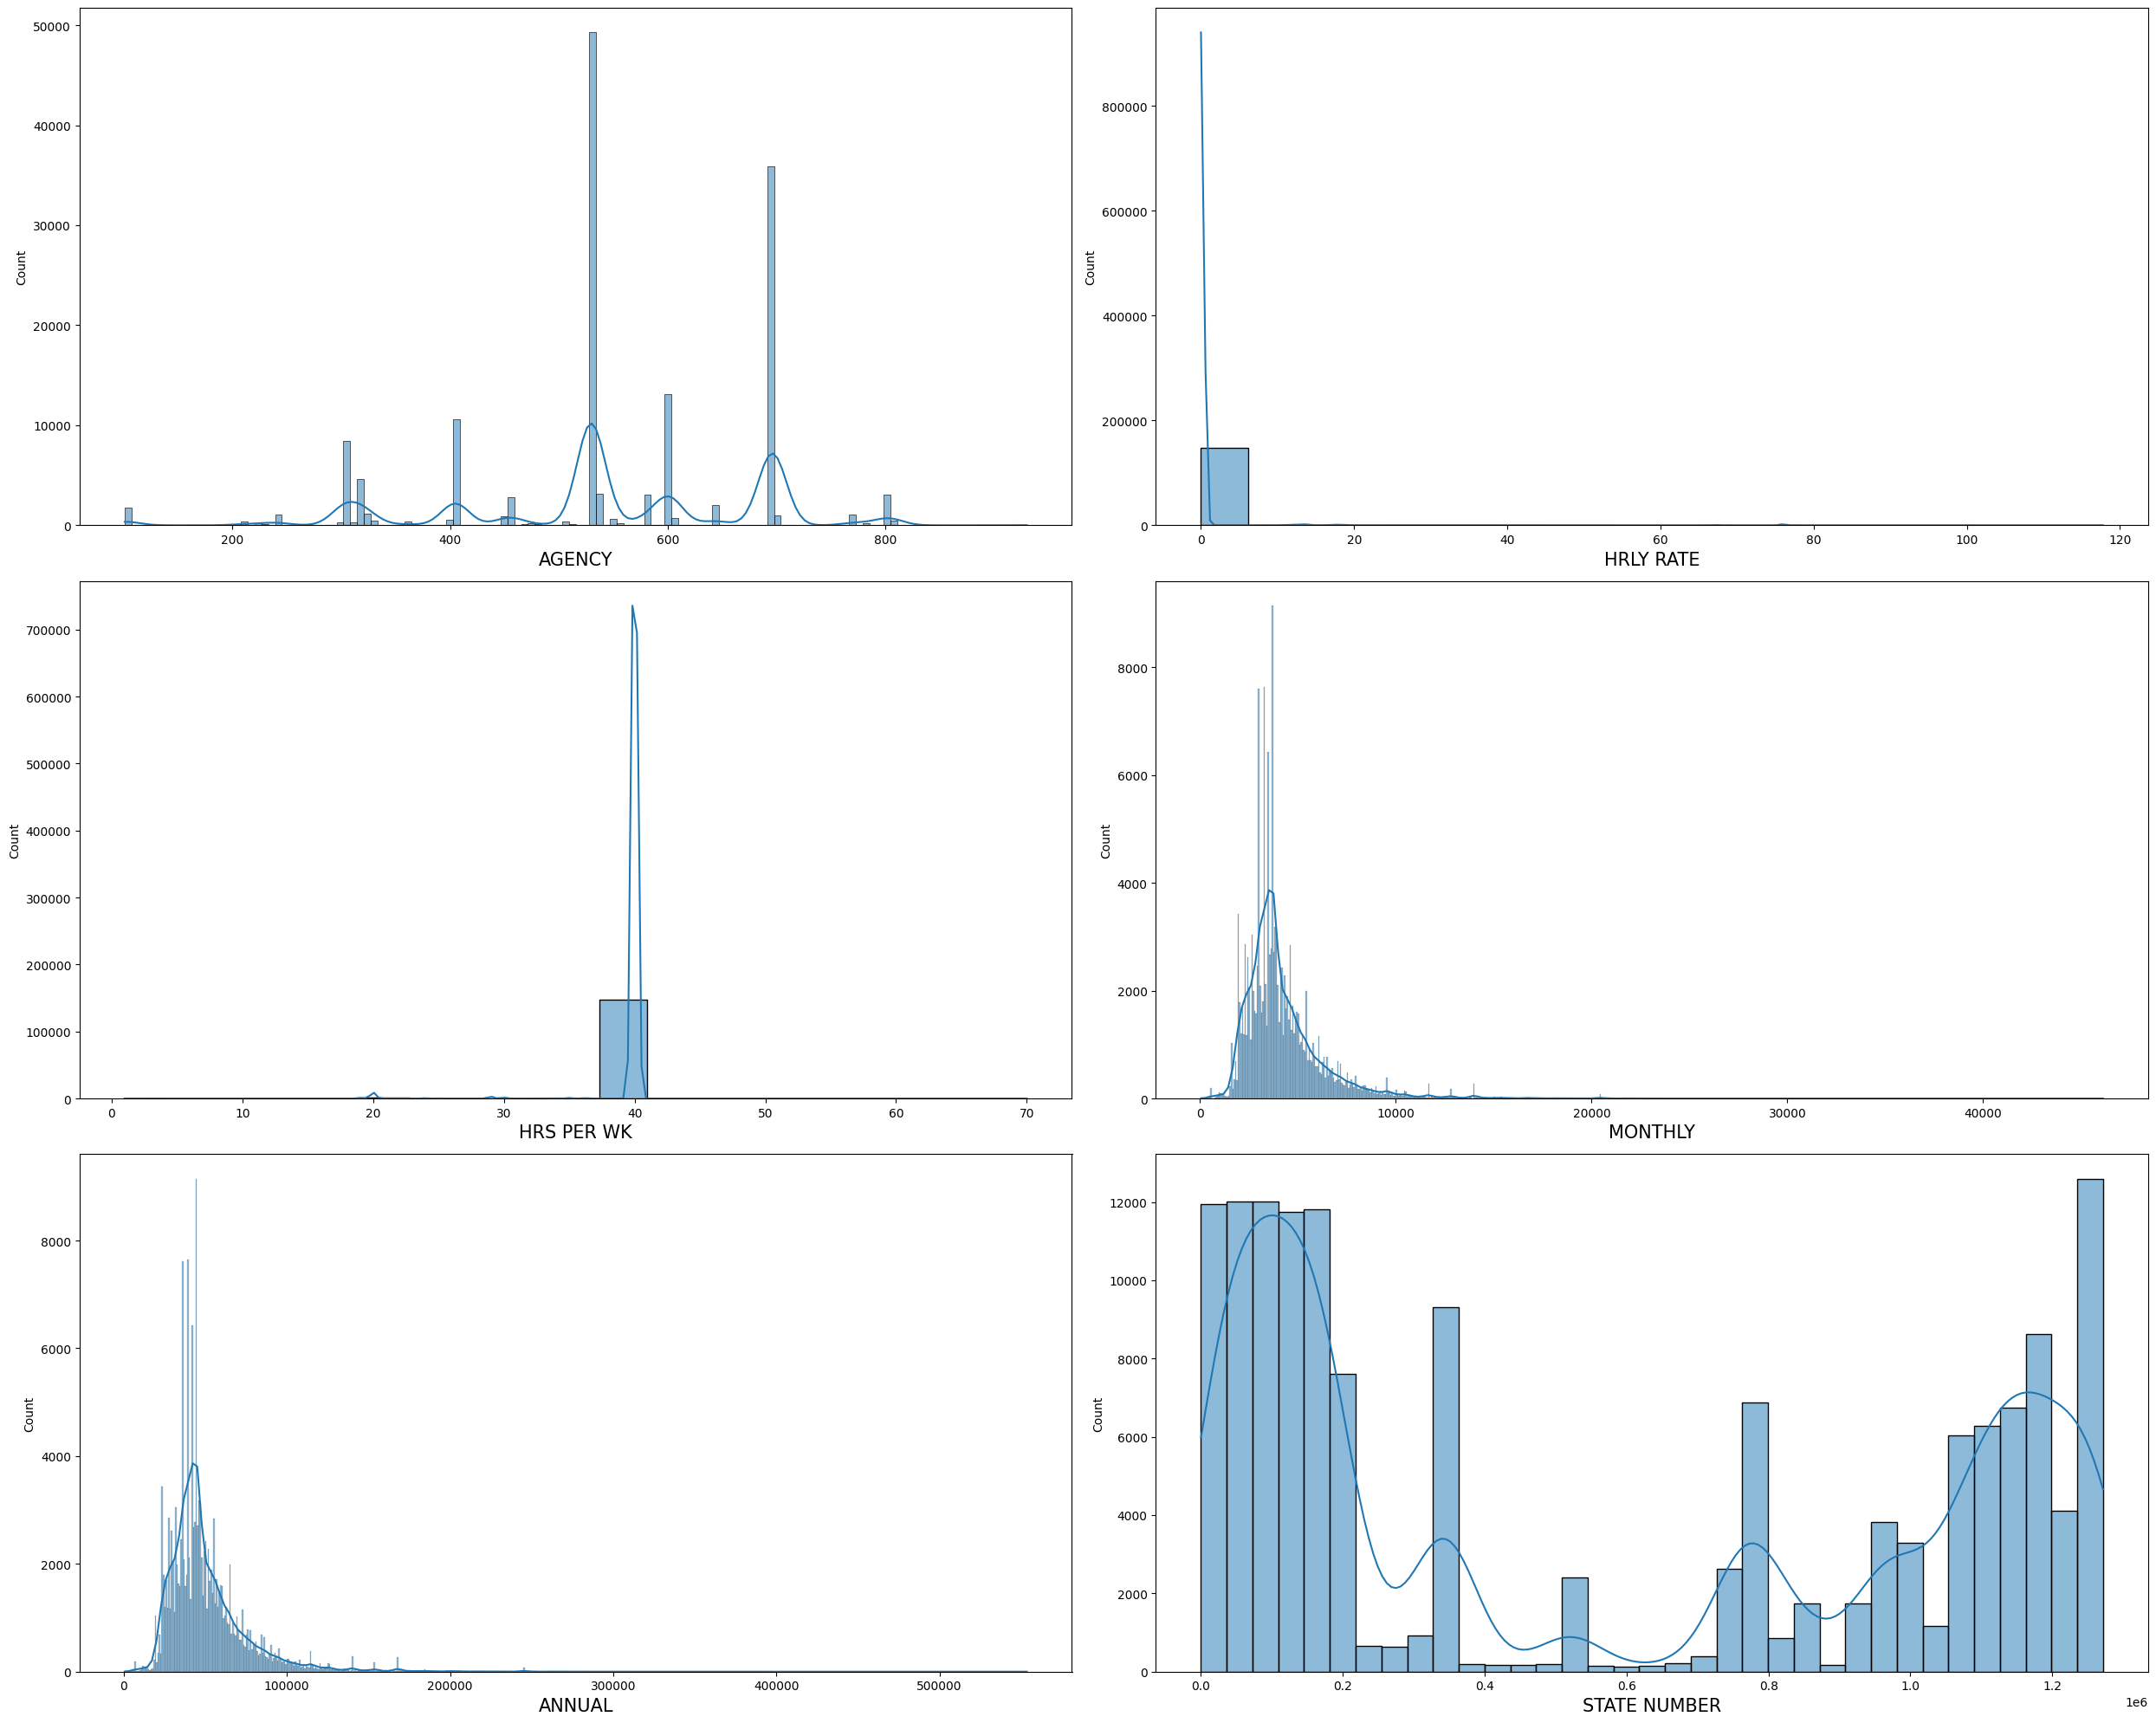

In [154]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in data.select_dtypes(include=["int64","float64"]):
    if plt_num <= 6:
        plt.subplot(3,2,plt_num)
        sns.histplot(data[column],kde=True)
        plt.xlabel(column,fontsize=15)
    plt_num += 1
plt.tight_layout()

**Insights:-**
* Here we can not seen that any columns follow normal distributions.

#### 2. Baivariant Analysis

* Bivariate analysis is the statistical analysis of two variables to determine their relationship, correlation, or dependency. It helps in understanding how one variable changes concerning another and is essential for identifying patterns, associations, or trends between variables. This analysis can be performed using both numerical and categorical variables. For two numerical variables, scatter plots and correlation coefficients (such as Pearson or Spearman correlation) are used to measure the strength and direction of their relationship. A high positive correlation indicates that both variables increase together, while a high negative correlation means that as one increases, the other decreases. For one numerical and one categorical variable, box plots and bar charts help compare distributions across categories. If both variables are categorical, a contingency table or chi-square test is used to analyze their association. Bivariate analysis is crucial in data exploration and feature selection, as it helps determine which variables have significant relationships and can impact predictive modeling.

In [ ]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in data.select_dtypes(include=["object"]):
    if plt_num <= 10:
        plt.subplot(5,2,plt_num)
        sns.countplot(x = data[column], hue = data["ANNUAL"])
        plt.xlabel(column,fontsize=15)
    plt_num += 1
plt.tight_layout()

#### 3. Multivariant Analysis

* Multivariate analysis is the statistical examination of three or more variables simultaneously to understand complex relationships and interactions within a dataset. Unlike univariate and bivariate analysis, which focus on one or two variables, multivariate analysis helps in identifying patterns, dependencies, and correlations among multiple variables. This type of analysis is essential in real-world applications where multiple factors influence an outcome, such as predicting salaries based on experience, education, and job title. Common techniques include multiple regression, which assesses the impact of several independent variables on a dependent variable, and principal component analysis (PCA), which reduces dimensionality while retaining essential information. Cluster analysis is another multivariate technique used for grouping similar data points based on multiple features. Multivariate analysis is widely used in machine learning, business analytics, and scientific research to make data-driven decisions and build predictive models. It provides deeper insights into data relationships, enhances model accuracy, and helps in feature selection, ultimately improving decision-making processes.

In [ ]:
sns.pairplot(data)

## Feautre Engineering

* Feature engineering is the process of transforming raw data into meaningful features that improve the performance of machine learning models. It involves selecting, modifying, creating, or encoding features to enhance the model’s predictive power. This process includes several techniques, such as handling missing values by imputation, encoding categorical variables using methods like one-hot encoding or label encoding, and scaling numerical data to ensure consistency. Feature extraction, such as using Principal Component Analysis (PCA) to reduce dimensionality, and feature transformation, like applying logarithmic scaling to handle skewed data, are also common approaches. Additionally, feature selection methods, such as Recursive Feature Elimination (RFE) or mutual information, help in identifying the most relevant features while removing redundant or irrelevant ones. Creating new features by combining existing ones, such as calculating the age from a date of birth column or deriving interaction terms, can also improve model performance. Effective feature engineering plays a critical role in building high-performing machine learning models, as the quality of input features directly impacts the accuracy and interpretability of predictions.

### 1. Data Preprocessing

* Data preprocessing is the essential step in machine learning where raw data is cleaned, transformed, and prepared for modeling to ensure accurate and reliable predictions. It involves multiple steps, starting with handling missing values, where techniques like mean, median, or mode imputation are used to fill gaps in numerical data, while categorical missing values can be replaced with the most frequent category or a separate label. Handling outliers is another important step, which can be done using statistical methods like the interquartile range (IQR) or by applying transformation techniques. Data normalization or standardization is often required to scale numerical features, ensuring that variables with different units or ranges do not negatively impact model performance. Encoding categorical variables using techniques such as one-hot encoding or label encoding allows machine learning models to process non-numeric data. Feature selection and dimensionality reduction help in improving model efficiency by removing irrelevant or redundant features. Additionally, splitting the dataset into training and testing sets ensures that models are evaluated on unseen data, preventing overfitting. Data preprocessing is a crucial phase that directly impacts the quality of machine learning models, making them more robust, accurate, and generalizable.

In [180]:
data.isnull().sum()

AGENCY          0
AGENCY NAME     0
LAST NAME       0
FIRST NAME      0
MI              0
CLASS CODE      0
CLASS TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
EMPLOY DATE     0
HRLY RATE       0
HRS PER WK      0
MONTHLY         0
ANNUAL          0
STATE NUMBER    0
dtype: int64

In [181]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030


In [182]:
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER'],
      dtype='object')

In [183]:
conti_col = ["AGENCY",'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER']

### Outliers:-
* An outlier is a data point that significantly deviates from the overall pattern of a dataset. It can be either much higher or lower than the majority of values and may result from measurement errors, data entry mistakes, or genuine extreme variations in the data. Outliers can distort statistical summaries, such as the mean and standard deviation, leading to misleading conclusions. Detecting outliers is essential in data analysis and can be done using methods like Z-score, Interquartile Range (IQR), and visualization techniques such as boxplots. Depending on the context, outliers can be removed, transformed, or treated carefully to ensure they do not negatively impact model performance.

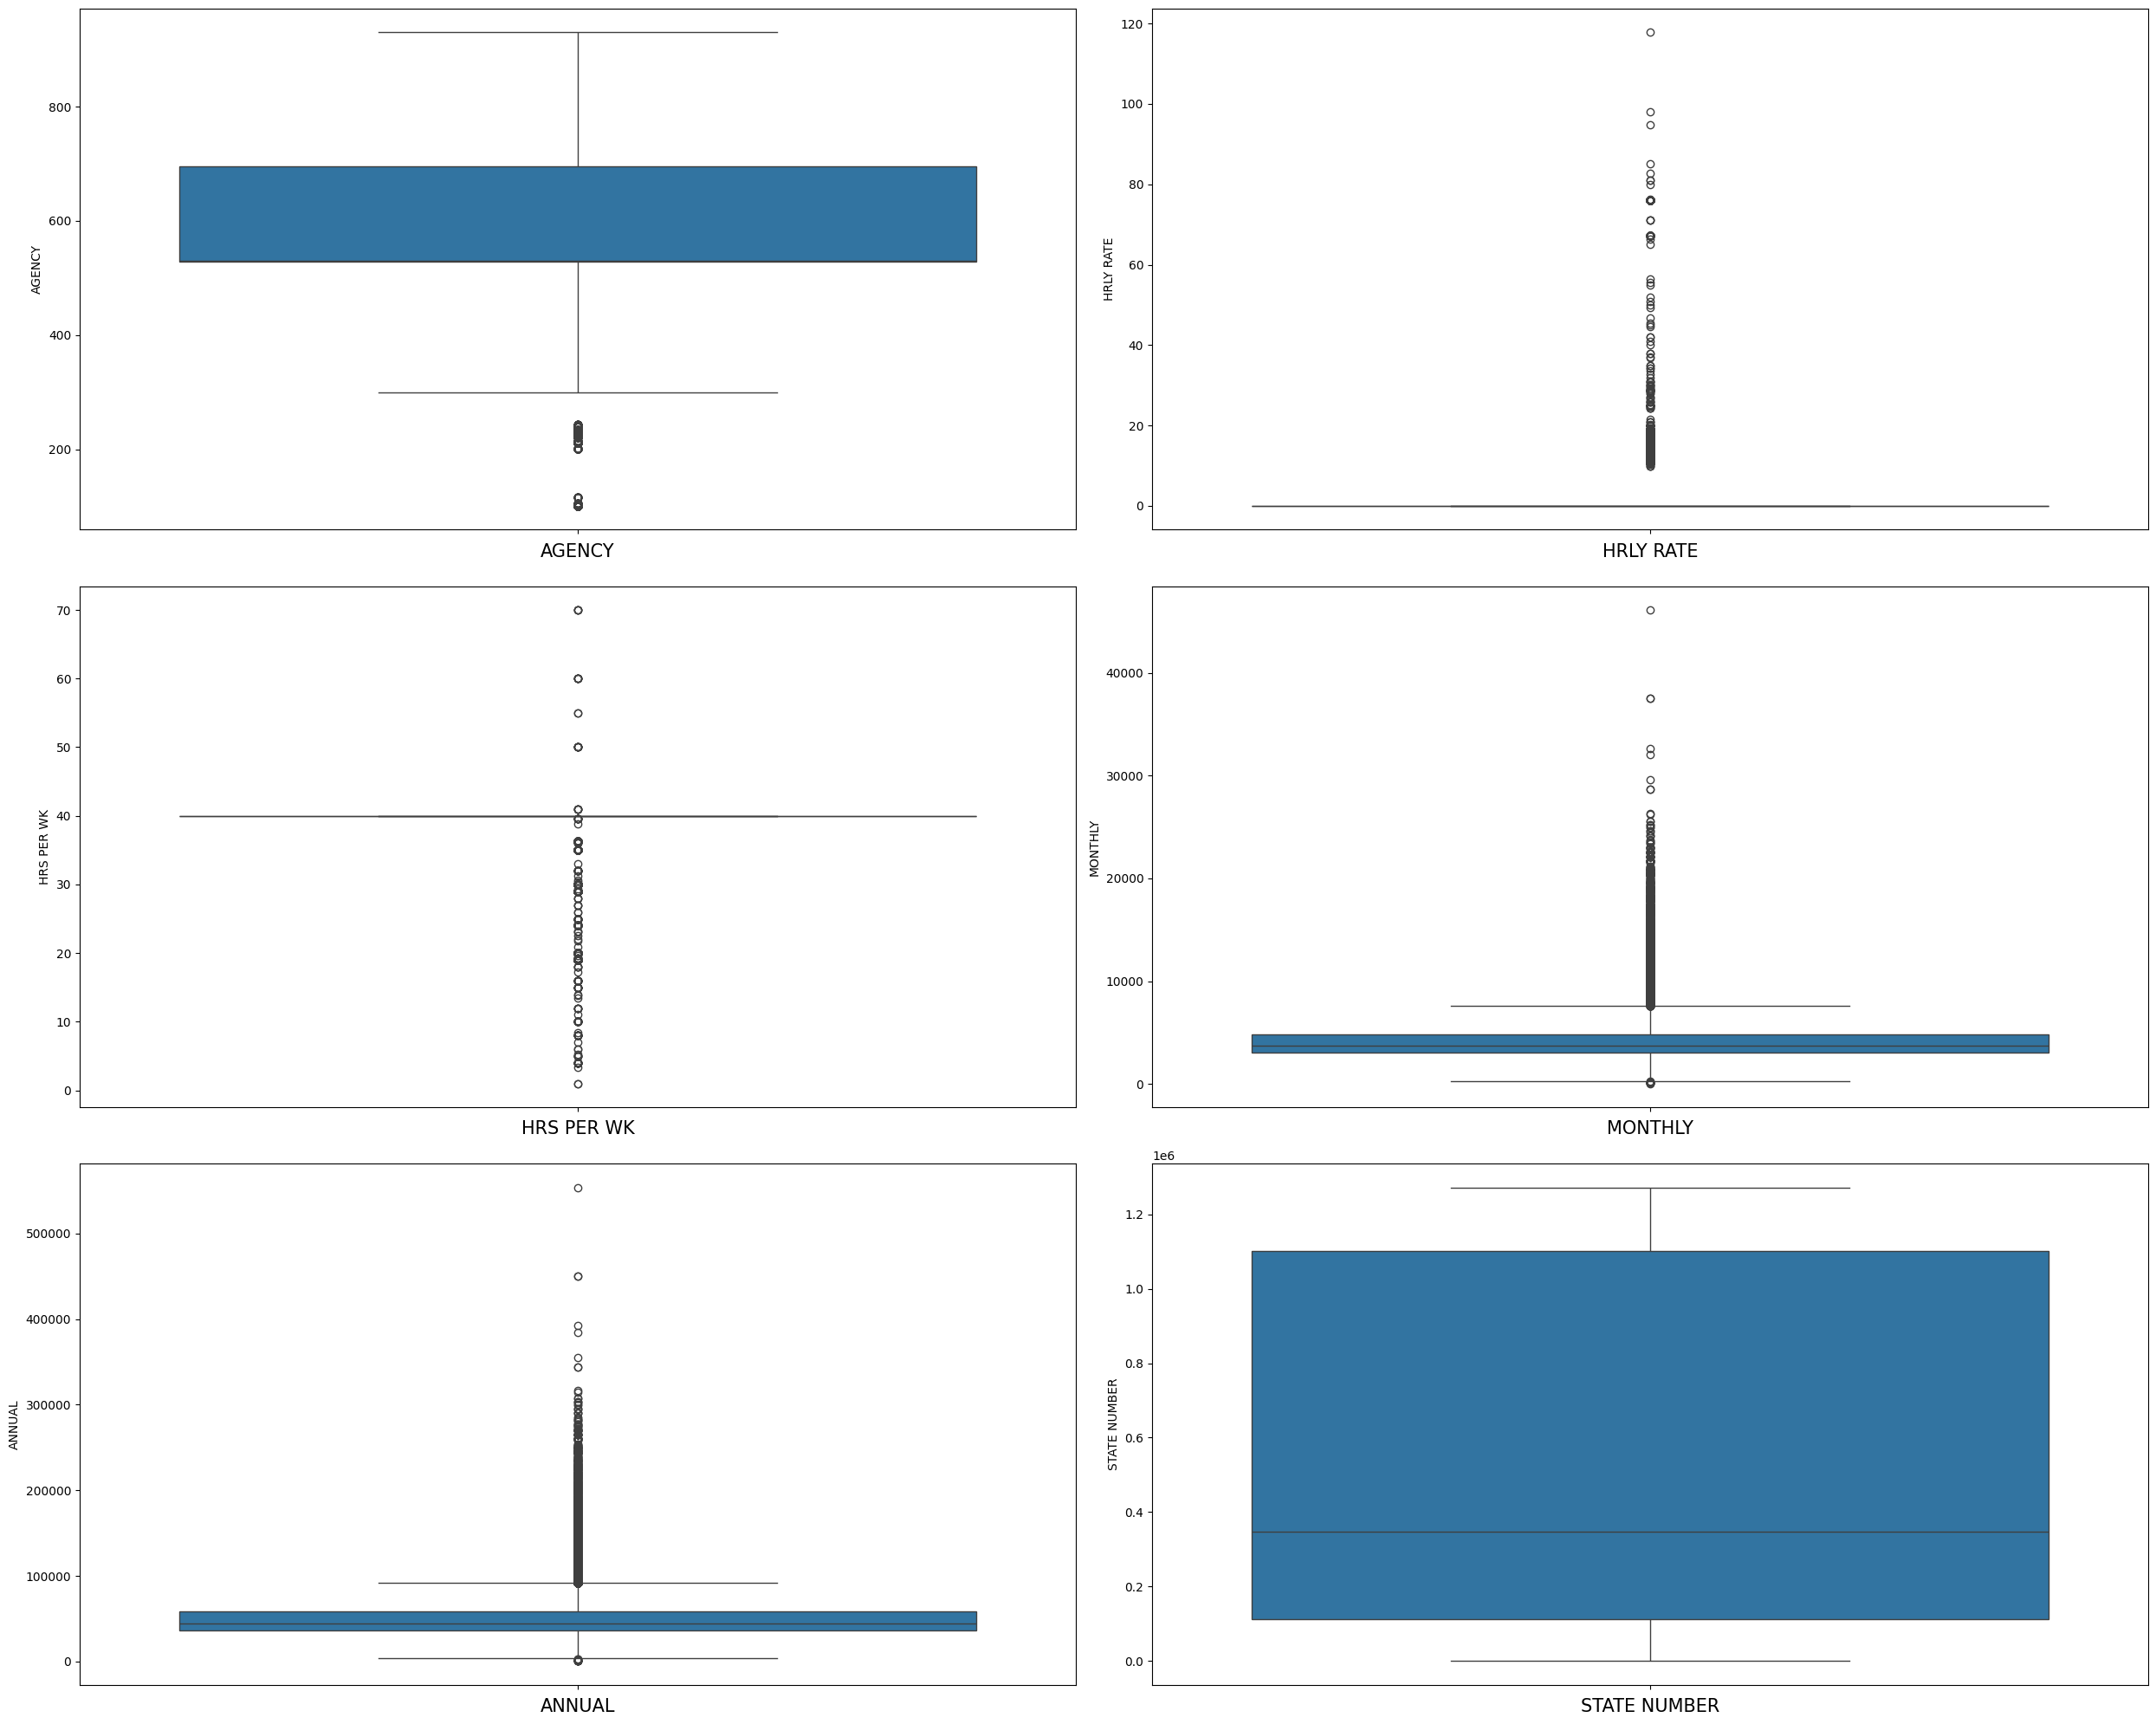

In [184]:
plt.figure(figsize=(25,20))
plt_num = 1
for column in conti_col:
    if plt_num <= 6:
        plt.subplot(3,2,plt_num)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plt_num += 1
plt.tight_layout()

<Axes: >

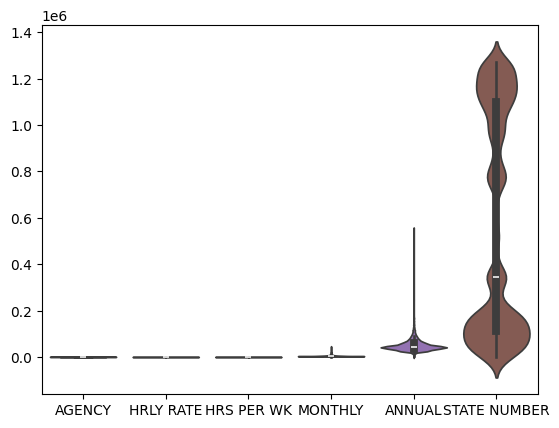

In [185]:
sns.violinplot(data=data[conti_col])

<Axes: ylabel='AGENCY'>

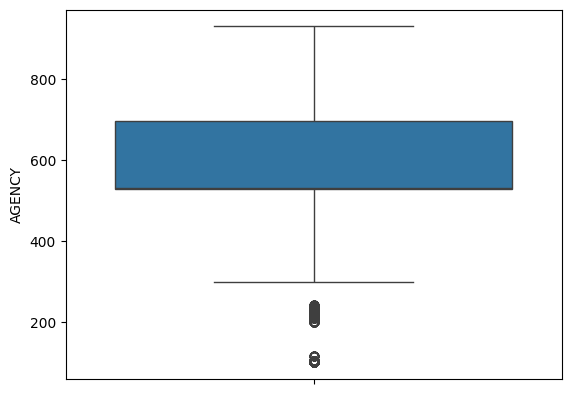

In [186]:
sns.boxplot(data["AGENCY"])

In [187]:
data["AGENCY"].median()

530.0

In [188]:
data.loc[data["AGENCY"] <= 300,"AGENCY"] = 530.0

<Axes: ylabel='AGENCY'>

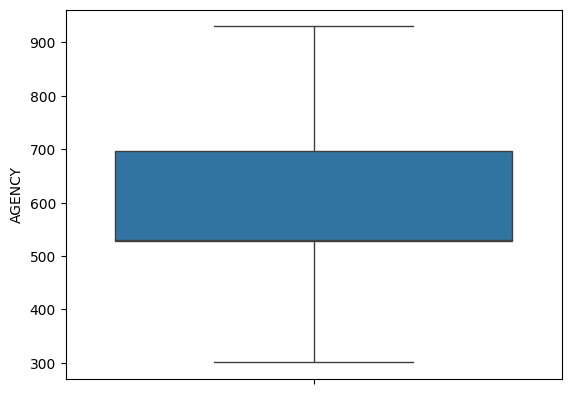

In [189]:
sns.boxplot(data["AGENCY"])

<Axes: ylabel='MONTHLY'>

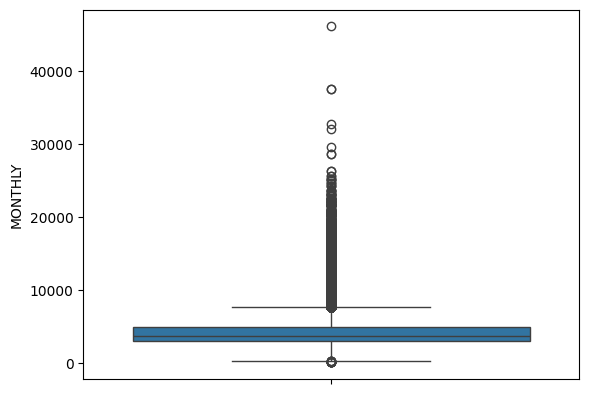

In [190]:
sns.boxplot(data["MONTHLY"])

In [191]:
data["MONTHLY"].median()

3720.17

In [192]:
data.loc[data["MONTHLY"] >= 28000,"MONTHLY"] = 3720.17

<Axes: ylabel='MONTHLY'>

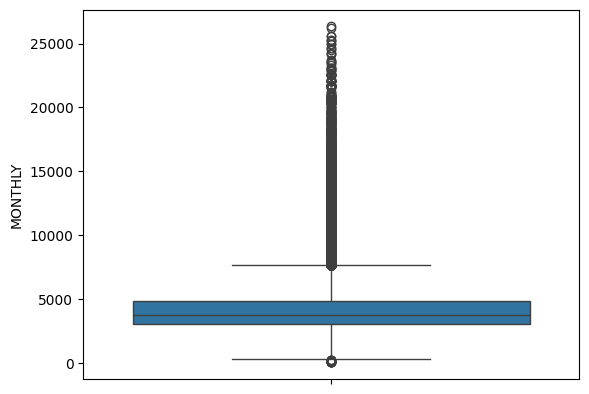

In [193]:
sns.boxplot(data["MONTHLY"])

<Axes: ylabel='ANNUAL'>

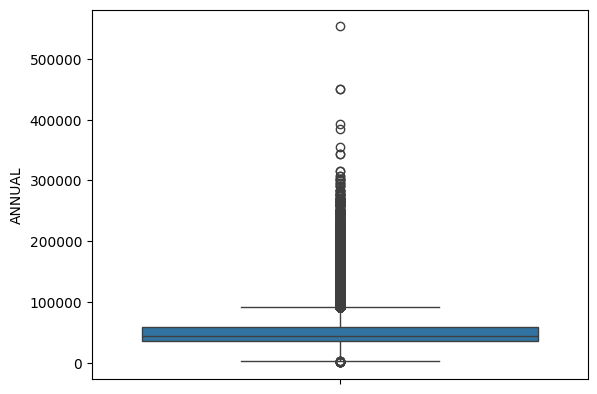

In [194]:
sns.boxplot(data["ANNUAL"])

In [195]:
data["ANNUAL"].median()

44642.04

In [196]:
data.loc[data["ANNUAL"] >= 320000,"ANNUAL"] = 44642.04

<Axes: ylabel='ANNUAL'>

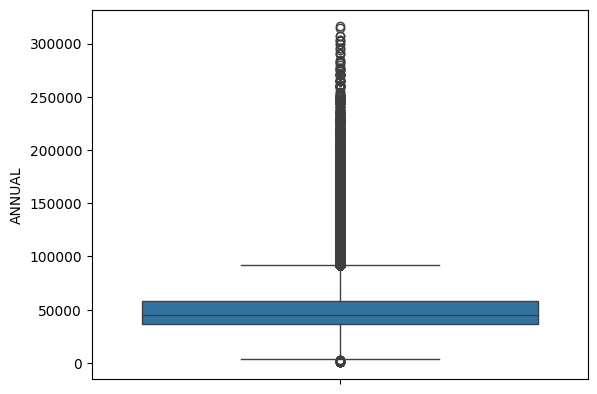

In [197]:
sns.boxplot(data["ANNUAL"])

In [198]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,530,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,530,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,530,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,530,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030


In [199]:
data.drop(["AGENCY"],axis=1,inplace=True)

In [200]:
data.drop(["LAST NAME","FIRST NAME","MI"],axis=1,inplace=True)

In [201]:
data.drop(["CLASS CODE"],axis=1,inplace=True)

In [202]:
data.head()

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...","JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,OFFICE OF COURT ADMINISTRATION ...,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030


In [203]:
for i in data.select_dtypes(include=["object"]):
    print(data[i].unique())
    print("\n")
    print(len(data[i].unique()))
    print("\n")

['COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION '
 'OFFICE OF COURT ADMINISTRATION                    '
 'TEXAS DEPARTMENT OF CRIMINAL JUSTICE              '
 'OFFICE OF THE ATTORNEY GENERAL                    '
 'TEXAS DEPARTMENT OF TRANSPORTATION                '
 'TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL         '
 'BOARD OF EXAMINERS OF PSYCHOLOGISTS               '
 'DEPARTMENT OF STATE HEALTH SERVICES               '
 'DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES      '
 'HEALTH AND HUMAN SERVICES COMMISSION              '
 'DEPARTMENT OF AGRICULTURE                         '
 'SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED        '
 'SCHOOL FOR THE DEAF                               '
 'SENATE                                            '
 'LEGISLATIVE BUDGET BOARD                          '
 'HOUSE OF REPRESENTATIVES                          '
 'TEXAS FACILITIES COMMISSION                       '
 'STATE PRESERVATION BOARD                          '
 'TEXAS LEGISLATIVE COUNCIL 

### Encoding:-
* Encoding is the process of converting categorical data into a numerical format so that machine learning models can interpret it. Since most models work with numerical data, categorical values need to be transformed into numbers while preserving their meaning. Encoding is essential for handling categorical variables effectively and improving model performance.

In [204]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["AGENCY NAME"] = le.fit_transform(data["AGENCY NAME"])
data["CLASS TITLE"] = le.fit_transform(data["CLASS TITLE"])
data["ETHNICITY"] = le.fit_transform(data["ETHNICITY"])
data["GENDER"] = le.fit_transform(data["GENDER"])
data["STATUS"] = le.fit_transform(data["STATUS"])

In [205]:
data.head()

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER
0,17,711,5,1,8,02/18/88,75.96150,29.0,9545.82,114549.84,127717
1,48,560,5,1,4,02/01/15,81.04454,4.0,1404.77,16857.24,127717
2,17,711,5,1,8,02/01/20,75.96150,29.0,9545.82,114549.84,59115
3,48,560,5,1,4,09/01/18,81.04453,4.0,1404.77,16857.24,59115
4,88,292,3,0,0,06/29/20,0.00000,40.0,3284.27,39411.24,165030


In [206]:
# from sklearn.preprocessing import OneHotEncoder
# oe = OneHotEncoder()
# df = pd.get_dummies(data["ETHNICITY"],dtype="int64",prefix="ETHNICITY")
# df1 = pd.get_dummies(data["GENDER"],dtype="int64",prefix="GENDER")

In [207]:
# data.drop(["ETHNICITY","GENDER"],axis=1,inplace=True)

In [208]:
# data = pd.concat([data,df,df1],axis=1)
# data.head()

In [209]:
data["EMPLOY DATE"] = data["EMPLOY DATE"].astype("datetime64[ns]")

In [210]:
data["Day"] = pd.to_datetime(data["EMPLOY DATE"]).dt.day
data["Month"] = pd.to_datetime(data["EMPLOY DATE"]).dt.month
data["Year"] = pd.to_datetime(data["EMPLOY DATE"]).dt.year

In [211]:
data.head()

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,Day,Month,Year
0,17,711,5,1,8,1988-02-18,75.96150,29.0,9545.82,114549.84,127717,18,2,1988
1,48,560,5,1,4,2015-02-01,81.04454,4.0,1404.77,16857.24,127717,1,2,2015
2,17,711,5,1,8,2020-02-01,75.96150,29.0,9545.82,114549.84,59115,1,2,2020
3,48,560,5,1,4,2018-09-01,81.04453,4.0,1404.77,16857.24,59115,1,9,2018
4,88,292,3,0,0,2020-06-29,0.00000,40.0,3284.27,39411.24,165030,29,6,2020


In [212]:
data.drop(["EMPLOY DATE"],axis=1,inplace=True)

In [213]:
data.head()

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,Day,Month,Year
0,17,711,5,1,8,75.96150,29.0,9545.82,114549.84,127717,18,2,1988
1,48,560,5,1,4,81.04454,4.0,1404.77,16857.24,127717,1,2,2015
2,17,711,5,1,8,75.96150,29.0,9545.82,114549.84,59115,1,2,2020
3,48,560,5,1,4,81.04453,4.0,1404.77,16857.24,59115,1,9,2018
4,88,292,3,0,0,0.00000,40.0,3284.27,39411.24,165030,29,6,2020


In [214]:
data.drop(["STATE NUMBER"],axis=1,inplace=True)

In [215]:
data.head()

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,Day,Month,Year
0,17,711,5,1,8,75.96150,29.0,9545.82,114549.84,18,2,1988
1,48,560,5,1,4,81.04454,4.0,1404.77,16857.24,1,2,2015
2,17,711,5,1,8,75.96150,29.0,9545.82,114549.84,1,2,2020
3,48,560,5,1,4,81.04453,4.0,1404.77,16857.24,1,9,2018
4,88,292,3,0,0,0.00000,40.0,3284.27,39411.24,29,6,2020


## Feature Selection

* Feature selection is the process of identifying and selecting the most relevant features (variables) from a dataset to improve the performance of a machine learning model. It helps in reducing the dimensionality of the data, which can enhance model accuracy, decrease training time, and prevent overfitting. By eliminating irrelevant or redundant features, feature selection ensures that the model focuses on the most important aspects of the data, leading to better generalization on unseen data. Common techniques for feature selection include filter methods (such as correlation analysis and chi-square test), wrapper methods (such as forward and backward selection), and embedded methods (such as LASSO and decision tree-based feature importance). Effective feature selection not only optimizes computational efficiency but also improves model interpretability, making it easier to understand which factors contribute most to predictions.

<Axes: >

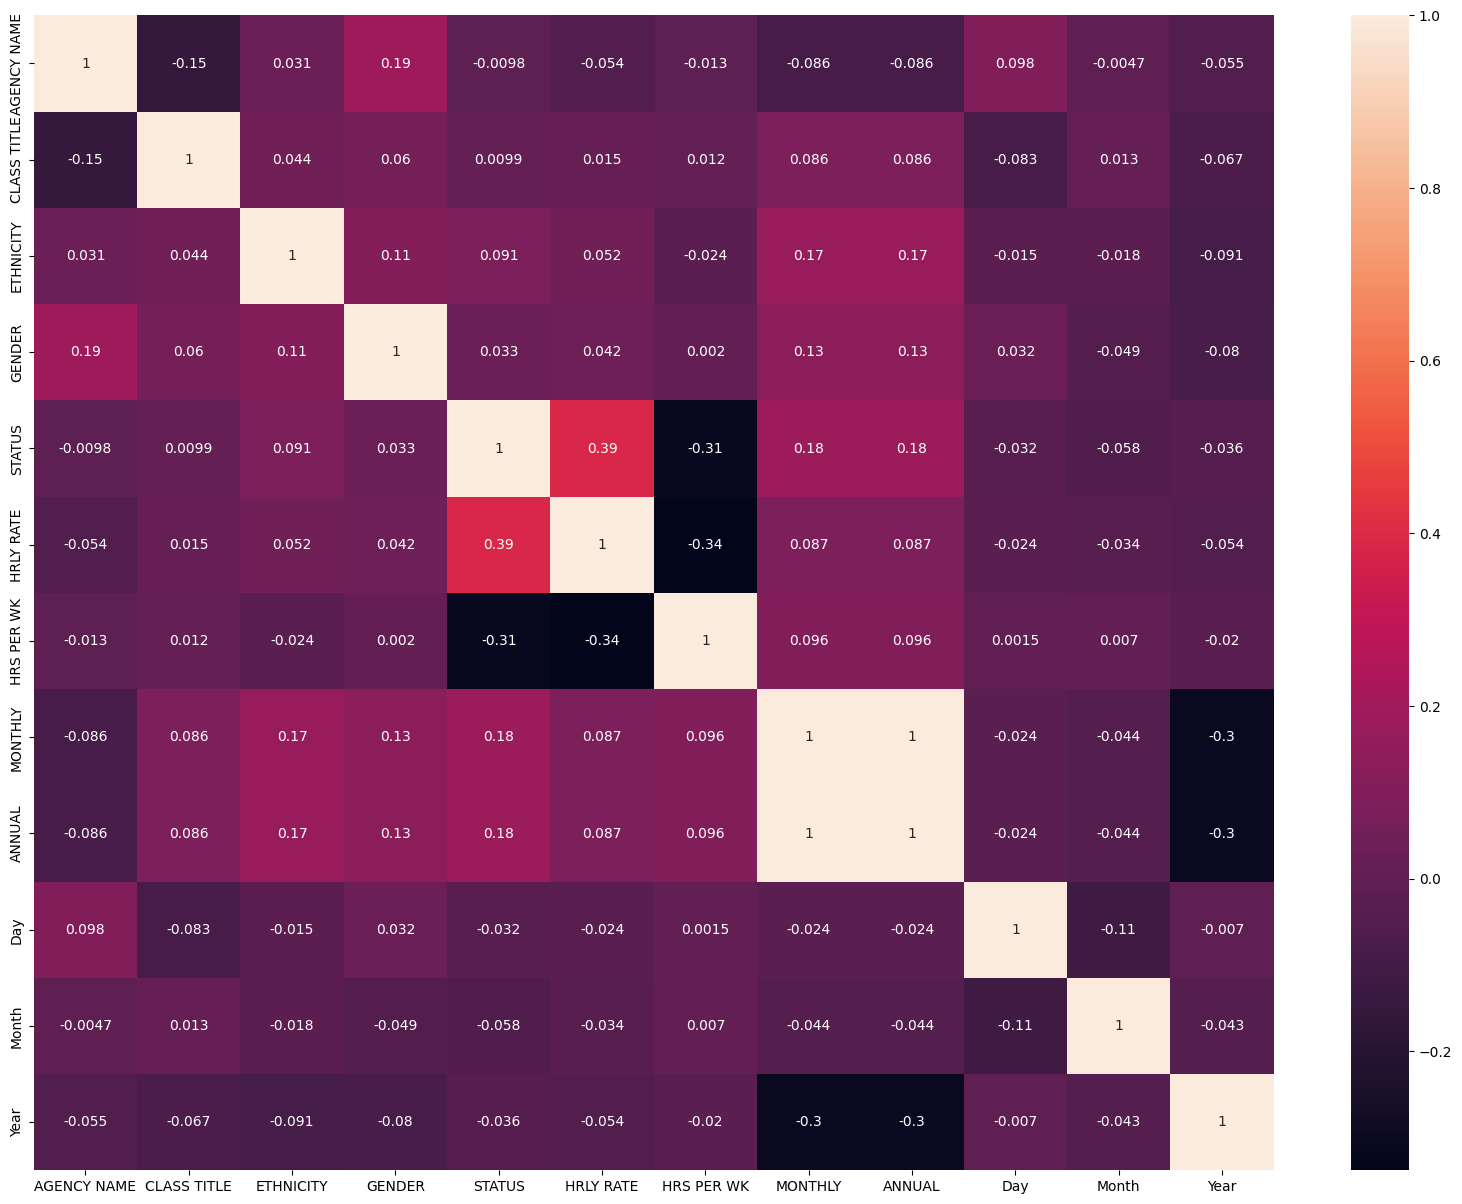

In [216]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)

## Model Creation

* Model creation is the process of building a machine learning model that learns patterns from data to make predictions or classifications. It involves selecting an appropriate algorithm based on the problem type, such as regression, classification, or clustering. The process starts with data preprocessing, including cleaning, feature engineering, and feature selection, followed by splitting the data into training and testing sets. The chosen algorithm is then trained using the training data, where it learns relationships between input features and target variables. Hyperparameter tuning is performed to optimize model performance, ensuring a balance between bias and variance. Finally, the model is evaluated using metrics like accuracy, precision, recall, or RMSE to assess its effectiveness. A well-created model generalizes well to new data, making it a valuable tool for decision-making and predictions.

In [217]:
x = data.drop(["ANNUAL"],axis=1)
y = data["ANNUAL"]

In [218]:
x

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,Day,Month,Year
0,17,711,5,1,8,75.96150,29.0,9545.82,18,2,1988
1,48,560,5,1,4,81.04454,4.0,1404.77,1,2,2015
2,17,711,5,1,8,75.96150,29.0,9545.82,1,2,2020
3,48,560,5,1,4,81.04453,4.0,1404.77,1,9,2018
4,88,292,3,0,0,0.00000,40.0,3284.27,29,6,2020
...,...,...,...,...,...,...,...,...,...,...,...
149476,76,1198,5,1,0,0.00000,40.0,2899.00,30,10,2017
149477,76,1404,5,0,0,0.00000,40.0,5500.00,13,7,2015
149478,76,324,5,1,1,12.93000,20.0,1120.60,15,10,2012
149479,76,1007,5,1,0,0.00000,40.0,5744.16,22,9,1989


In [219]:
y

0         114549.84
1          16857.24
2         114549.84
3          16857.24
4          39411.24
            ...    
149476     34788.00
149477     66000.00
149478     13447.20
149479     68929.92
149480     12209.52
Name: ANNUAL, Length: 149481, dtype: float64

In [220]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [221]:
x_train

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,Day,Month,Year
85035,91,858,3,1,0,0.0,40.0,9783.00,8,4,2013
113180,88,293,5,1,0,0.0,40.0,3629.45,26,8,2013
149224,98,98,5,1,0,0.0,40.0,4908.09,1,7,2018
37829,40,1304,5,0,0,0.0,40.0,3774.96,10,5,2018
131078,88,292,5,0,0,0.0,40.0,3284.27,24,9,2018
...,...,...,...,...,...,...,...,...,...,...,...
41993,40,1008,2,0,0,0.0,40.0,3778.59,1,9,2016
97639,90,326,3,1,1,0.0,20.0,1325.00,1,2,2020
95939,91,463,3,1,0,0.0,40.0,2900.00,22,1,2019
117952,88,76,3,1,0,0.0,40.0,3374.68,8,8,2013


In [222]:
x_test

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,Day,Month,Year
91068,91,162,5,1,0,0.0,40.0,5250.00,15,4,2019
108028,88,17,5,0,0,0.0,40.0,2736.23,11,6,2018
104693,88,1232,2,0,0,0.0,40.0,3906.09,1,8,1995
102315,88,292,2,1,0,0.0,40.0,3284.27,23,1,2017
88134,91,471,3,0,0,0.0,40.0,3705.66,5,9,2017
...,...,...,...,...,...,...,...,...,...,...,...
112106,88,292,5,0,0,0.0,40.0,3480.77,7,3,2016
51463,40,235,5,0,0,0.0,40.0,2102.38,23,9,2013
19350,28,280,2,1,0,0.0,40.0,4223.00,15,3,2019
124017,88,292,2,1,1,0.0,20.0,1642.14,4,6,2018


## Model Selection

* Model selection is the process of choosing the best machine learning model for a given dataset and problem by comparing multiple models based on their performance. It involves evaluating different algorithms, such as decision trees, random forests, support vector machines, or deep learning models, to determine which one best captures the underlying patterns in the data. The selection process typically includes splitting the dataset into training and testing sets, training different models, and assessing their performance using evaluation metrics like accuracy, precision, recall, F1-score, RMSE, or R-squared. Techniques like cross-validation help ensure that the selected model generalizes well to new data and is not overfitting or underfitting. Additionally, hyperparameter tuning and feature selection play a crucial role in optimizing model performance. The goal of model selection is to identify the most efficient and accurate model that balances complexity, interpretability, and computational cost while achieving the best possible predictions.

## Linear Regression

* Linear regression is a fundamental machine learning algorithm used for predicting a continuous numerical value based on one or more input features. It establishes a linear relationship between the dependent variable (target) and independent variables (features) by fitting a straight line to the data. The equation for simple linear regression is Y = mX + b, where Y is the predicted value, X is the independent variable, m represents the slope (coefficient), and b is the intercept. In multiple linear regression, the equation extends to include multiple features. The model aims to minimize the difference between actual and predicted values using techniques like the least squares method. Linear regression is widely used in forecasting, trend analysis, and risk assessment due to its simplicity and interpretability. However, it assumes a linear relationship between variables, normality of errors, and minimal multicollinearity, making it essential to check these assumptions before applying the model.

In [223]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [224]:
y_lr = LR.predict(x_test)

#### Linear Regression Metrics

* Linear regression metrics evaluate model performance by measuring the difference between actual and predicted values. MAE calculates the average absolute error, MSE and RMSE penalize larger errors by squaring them, and R-squared (R²) measures how well the model explains variance in the target variable. Adjusted R² accounts for the number of predictors to prevent overfitting. These metrics help assess model accuracy and guide improvements.

In [225]:
from sklearn.metrics import *

In [226]:
a1 = r2_score(y_test,y_lr)
a1

1.0

In [227]:
y_tlr = LR.predict(x_train)

In [228]:
t1 = r2_score(y_train,y_tlr)
t1

1.0

In [229]:
mean_absolute_error(y_test,y_lr)

1.9409106351114925e-10

In [230]:
mean_squared_error(y_test,y_lr)

8.412726485087789e-20

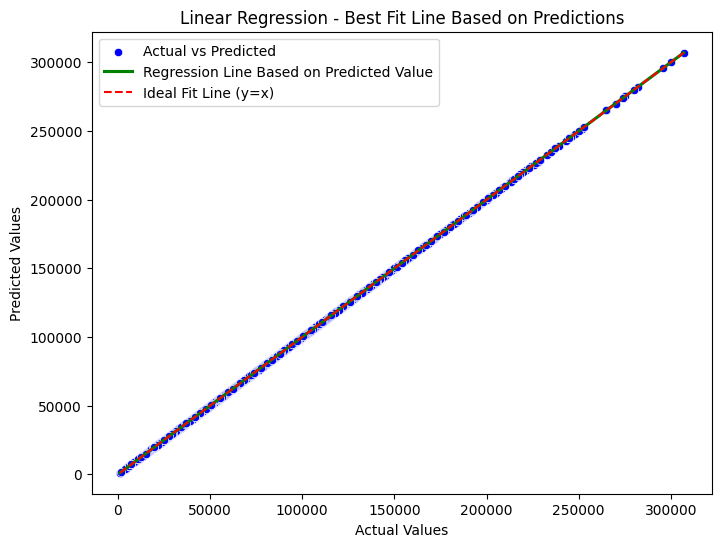

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_lr, color='blue', label="Actual vs Predicted")

# Regression line based on predicted values
sns.regplot(x=y_test, y=y_lr, scatter=False, color='green', label="Regression Line Based on Predicted Value")

# Best-fit reference line (ideal y=x line)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle="--", label="Ideal Fit Line (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression - Best Fit Line Based on Predictions")
plt.legend()
plt.show()

## Decision Tree Algorithm

* A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It works by recursively splitting the dataset into smaller subsets based on feature conditions, forming a tree-like structure. Each internal node represents a decision based on a feature, branches indicate possible outcomes, and leaf nodes contain final predictions. The splits are chosen using criteria like Gini Impurity or Entropy for classification and Mean Squared Error (MSE) for regression. Decision Trees are easy to interpret, handle both numerical and categorical data, and require minimal preprocessing. However, they tend to overfit, which can be controlled using techniques like pruning, setting depth limits, or using ensemble methods like Random Forest.

In [232]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [233]:
y_dt = dt.predict(x_test)

In [234]:
a2 = r2_score(y_test,y_dt)
a2

0.9892643571812667

In [235]:
y_tdt= dt.predict(x_train)

In [236]:
t2 = r2_score(y_train,y_tdt)
t2

0.9894242470571829

In [237]:
mean_absolute_error(y_test,y_dt)

1823.4144659739588

In [238]:
mean_squared_error(y_test,y_dt)

6721864.147524586

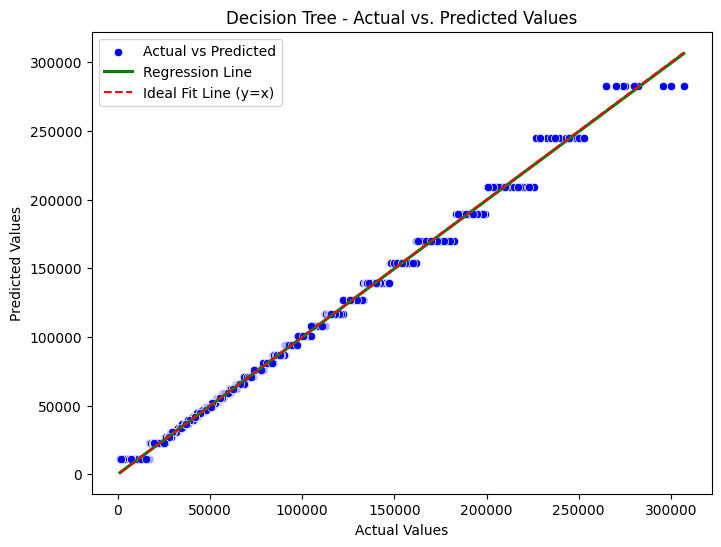

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Model
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(x_train, y_train)

# Predict using Decision Tree
y_dt = dt.predict(x_test)

# Plot the results
plt.figure(figsize=(8,6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_dt, color='blue', label="Actual vs Predicted")

# Regression line based on predicted values
sns.regplot(x=y_test, y=y_dt, scatter=False, color='green', label="Regression Line")

# Ideal y=x reference line (perfect prediction line)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle="--", label="Ideal Fit Line (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree - Actual vs. Predicted Values")
plt.legend()
plt.show()

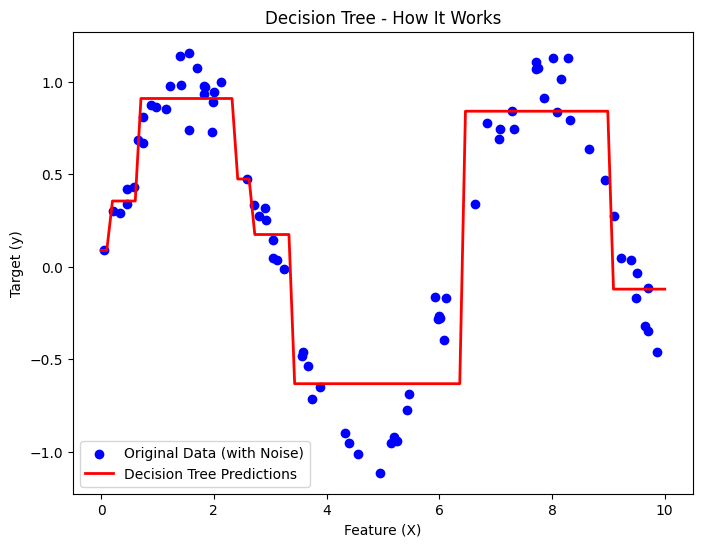

In [240]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Generate synthetic data
np.random.seed(42)
X = np.sort(10 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Adding noise

# Train Decision Tree Model
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X, y)

# Predict values
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = dt.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Original Data (with Noise)")
plt.plot(X_test, y_pred, color="red", label="Decision Tree Predictions", linewidth=2)
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Decision Tree - How It Works")
plt.legend()
plt.show()

## Bagging Algorithm

* Bagging (Bootstrap Aggregating) is an ensemble learning algorithm that improves model accuracy and reduces overfitting by combining multiple models trained on different subsets of the dataset. It works by randomly selecting samples with replacement (bootstrap sampling) to train multiple instances of the same base model, typically weak learners like Decision Trees. The final prediction is obtained through averaging (for regression) or majority voting (for classification). Bagging enhances model stability and accuracy by reducing variance without significantly increasing bias. A popular example of the Bagging algorithm is Random Forest, which applies Bagging to multiple Decision Trees for robust and generalizable predictions.

In [241]:
from sklearn.ensemble import BaggingRegressor
bg = BaggingRegressor()
bg.fit(x_train,y_train)

BaggingRegressor()

In [242]:
y_bg = bg.predict(x_test)

In [243]:
a3 = r2_score(y_test,y_bg)
a3

0.9999992351889088

In [244]:
y_tbg = bg.predict(x_train)

In [245]:
t3 = r2_score(y_train,y_tbg)
t3

0.9999991492611049

In [246]:
mean_absolute_error(y_test,y_bg)

1.8790591497746012

In [247]:
mean_squared_error(y_test,y_bg)

478.8680417965339

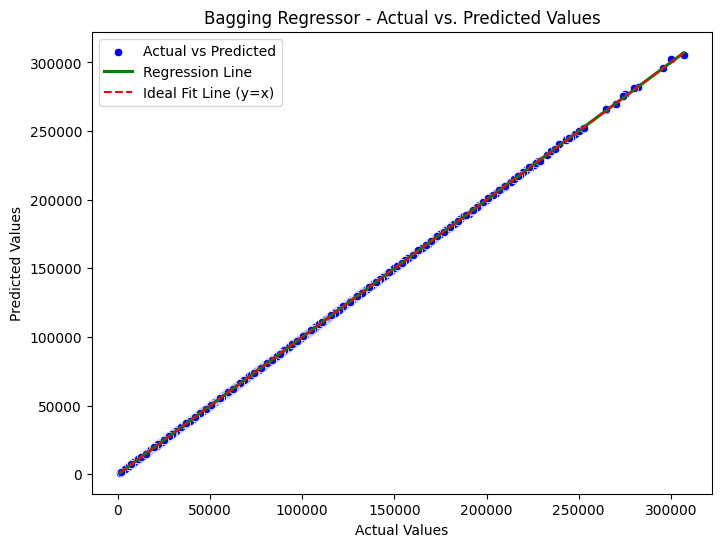

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Train Bagging Regressor Model
bagging = BaggingRegressor(n_estimators=50, random_state=42)
bagging.fit(x_train, y_train)

# Predict using Bagging Regressor
y_bagging = bagging.predict(x_test)

# Plot the results
plt.figure(figsize=(8,6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_bagging, color='blue', label="Actual vs Predicted")

# Regression line based on predicted values
sns.regplot(x=y_test, y=y_bagging, scatter=False, color='green', label="Regression Line")

# Ideal y=x reference line (perfect prediction line)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle="--", label="Ideal Fit Line (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Bagging Regressor - Actual vs. Predicted Values")
plt.legend()
plt.show()

## RandomForest Algorithm

* Random Forest is a powerful ensemble learning algorithm that builds multiple Decision Trees and combines their predictions to improve accuracy and reduce overfitting. It works by using Bagging (Bootstrap Aggregating), where each tree is trained on a randomly selected subset of the data with replacement. Additionally, at each split, it selects a random subset of features to ensure diversity among trees. The final prediction is obtained by averaging the outputs (for regression) or majority voting (for classification). Random Forest is robust to noise, handles missing data well, and works effectively with both classification and regression tasks, making it widely used in various machine learning applications.

In [249]:
from sklearn.ensemble import RandomForestRegressor
rm = RandomForestRegressor()
rm.fit(x_train,y_train)

RandomForestRegressor()

In [250]:
y_rm = rm.predict(x_test)

In [251]:
a4 = r2_score(y_test,y_rm)
a4

0.9999991913567879

In [252]:
y_trm = rm.predict(x_train)

In [253]:
t4 = r2_score(y_train,y_trm)
t4

0.9999994666307876

In [254]:
mean_absolute_error(y_test,y_rm)

1.6278684258827547

In [255]:
mean_squared_error(y_test,y_rm)

506.31246840260707

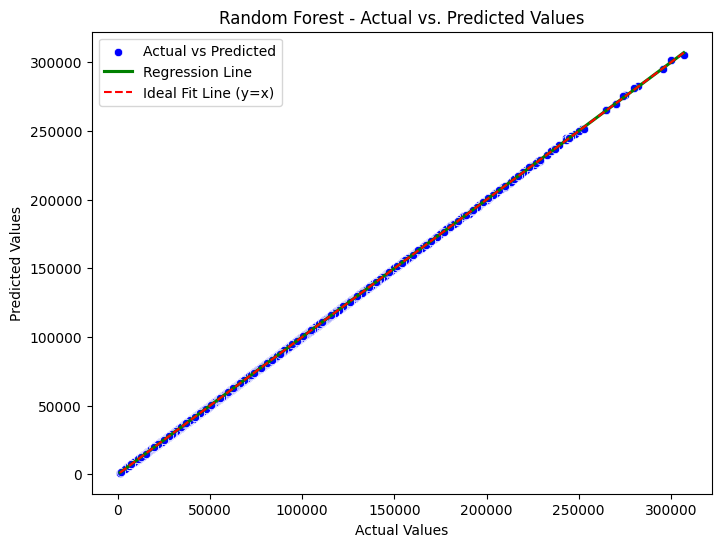

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor Model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(x_train, y_train)

# Predict using Random Forest Regressor
y_rf = rf.predict(x_test)

# Plot the results
plt.figure(figsize=(8,6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_rf, color='blue', label="Actual vs Predicted")

# Regression line based on predicted values
sns.regplot(x=y_test, y=y_rf, scatter=False, color='green', label="Regression Line")

# Ideal y=x reference line (perfect prediction line)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle="--", label="Ideal Fit Line (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest - Actual vs. Predicted Values")
plt.legend()
plt.show()

## Gradient Boosting Algorithm

* Gradient Boosting is an ensemble learning technique that builds multiple weak learners (typically Decision Trees) sequentially, where each new tree corrects the errors of the previous ones. Unlike Bagging, which trains models independently, Gradient Boosting trains models in a stage-wise manner, optimizing a loss function using gradient descent. Each new tree is fitted to the residual errors (difference between actual and predicted values) of the previous trees, gradually improving model accuracy. It is highly effective for both regression and classification tasks, offering superior predictive performance. However, it can be prone to overfitting, which can be controlled using techniques like learning rate adjustment, tree depth limitation, and regularization. Popular implementations include XGBoost, LightGBM, and CatBoost

In [257]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [258]:
y_gb = gb.predict(x_test)

In [259]:
a5 = r2_score(y_test,y_gb)
a5

0.9999112437434047

In [260]:
y_tgb = gb.predict(x_train)

In [261]:
t5 = r2_score(y_train,y_tgb)
t5

0.999915693370169

In [262]:
mean_absolute_error(y_test,y_gb)

139.36398560806637

In [263]:
mean_squared_error(y_test,y_gb)

55572.59207949205

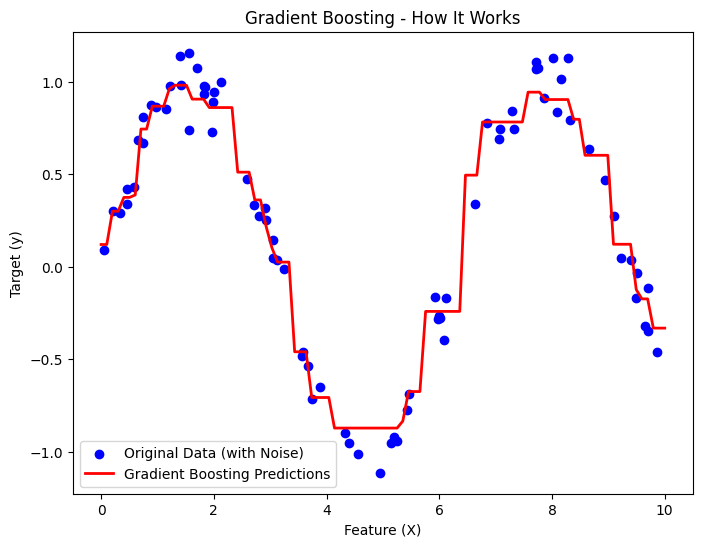

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Generate synthetic data
np.random.seed(42)
X = np.sort(10 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Adding noise

# Train Gradient Boosting Model
gb = GradientBoostingRegressor(n_estimators=5, learning_rate=0.5, max_depth=3, random_state=42)
gb.fit(X, y)

# Predict values
X_test = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = gb.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Original Data (with Noise)")
plt.plot(X_test, y_pred, color="red", label="Gradient Boosting Predictions", linewidth=2)
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Gradient Boosting - How It Works")
plt.legend()
plt.show()

## XGBoost Algorithm

* XGBoost (Extreme Gradient Boosting) is an advanced implementation of the Gradient Boosting algorithm designed for speed and performance. It improves traditional Gradient Boosting by using techniques like regularization (L1 & L2), parallel processing, tree pruning, and handling missing values efficiently. XGBoost applies second-order optimization, making it faster and more accurate in handling large datasets. It also includes early stopping, which prevents overfitting by stopping training when performance stops improving. XGBoost is widely used in machine learning competitions and real-world applications like fraud detection, recommendation systems, and predictive analytics due to its high efficiency and robustness.

In [265]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [266]:
y_xgb = xgb.predict(x_test)

In [267]:
a6 = r2_score(y_test,y_xgb)
a6

0.9965780905287555

In [268]:
y_txgb = xgb.predict(x_train)

In [269]:
t6 = r2_score(y_train,y_txgb)
t6

0.9994175645625561

In [270]:
mean_absolute_error(y_test,y_xgb)

208.3394279911437

In [271]:
mean_squared_error(y_test,y_xgb)

2142546.187424965

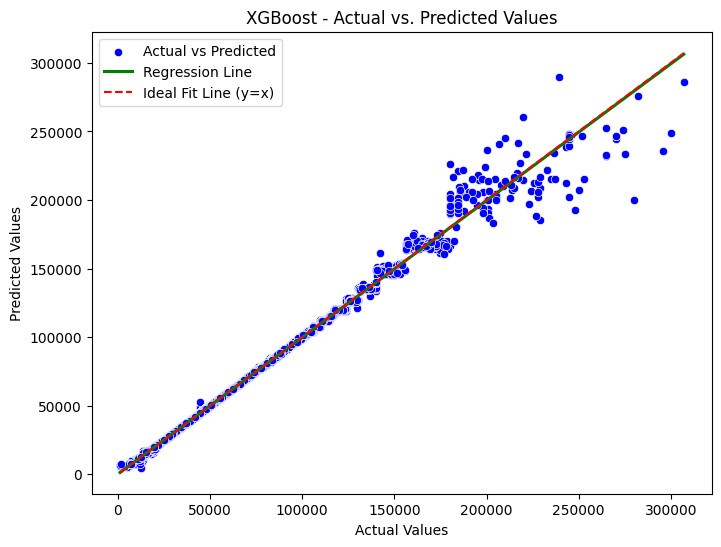

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from xgboost import XGBRegressor

# Train XGBoost Regressor Model
xgb = XGBRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(x_train, y_train)

# Predict using XGBoost Regressor
y_xgb = xgb.predict(x_test)

# Plot the results
plt.figure(figsize=(8,6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=y_test, y=y_xgb, color='blue', label="Actual vs Predicted")

# Regression line based on predicted values
sns.regplot(x=y_test, y=y_xgb, scatter=False, color='green', label="Regression Line")

# Ideal y=x reference line (perfect prediction line)
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle="--", label="Ideal Fit Line (y=x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost - Actual vs. Predicted Values")
plt.legend()
plt.show()

## Model Performance Comparison

In [273]:
# check the all algorithm model perforamnce in table form
# check the Model name, r2_score, mean_squer_error, mean_absolute_error
score = pd.DataFrame({"Model":["LinearRegression","DecisionTreeRegressor","Bagging Algorithm","RandomForestRegressor","GradiantBoosting Algorithm","XGBRegressor"],
                     "R2_Score":[a1*100,a2*100,a3*100,a4*100,a5*100,a6*100],
                      "Trainig_R2_Score":[t1*100,t2*100,t3*100,t4*100,t5*100,t6*100]})
score

,Model,R2_Score,Trainig_R2_Score
0,LinearRegression,100.000000,100.000000
1,DecisionTreeRegressor,98.926436,98.942425
2,Bagging Algorithm,99.999924,99.999915
3,RandomForestRegressor,99.999919,99.999947
4,GradiantBoosting Algorithm,99.991124,99.991569
5,XGBRegressor,99.657809,99.941756


* High Model Accuracy: All models achieved 98.93% to 100% R², indicating strong predictive power.

* Possible Overfitting: Linear Regression (100%) and other models with near-perfect scores may indicate overfitting or data leakage.

* Ensemble Models Perform Best: Bagging, Random Forest, and Gradient Boosting showed superior generalization with minimal overfitting.

* Need for Hyperparameter Tuning: XGBoost (99.66%) performed slightly lower, suggesting further tuning can improve results.

* Validation is Crucial: Despite high accuracy, models should be tested with cross-validation and real-world unseen data to ensure reliability.

<Figure size 1200x600 with 0 Axes>

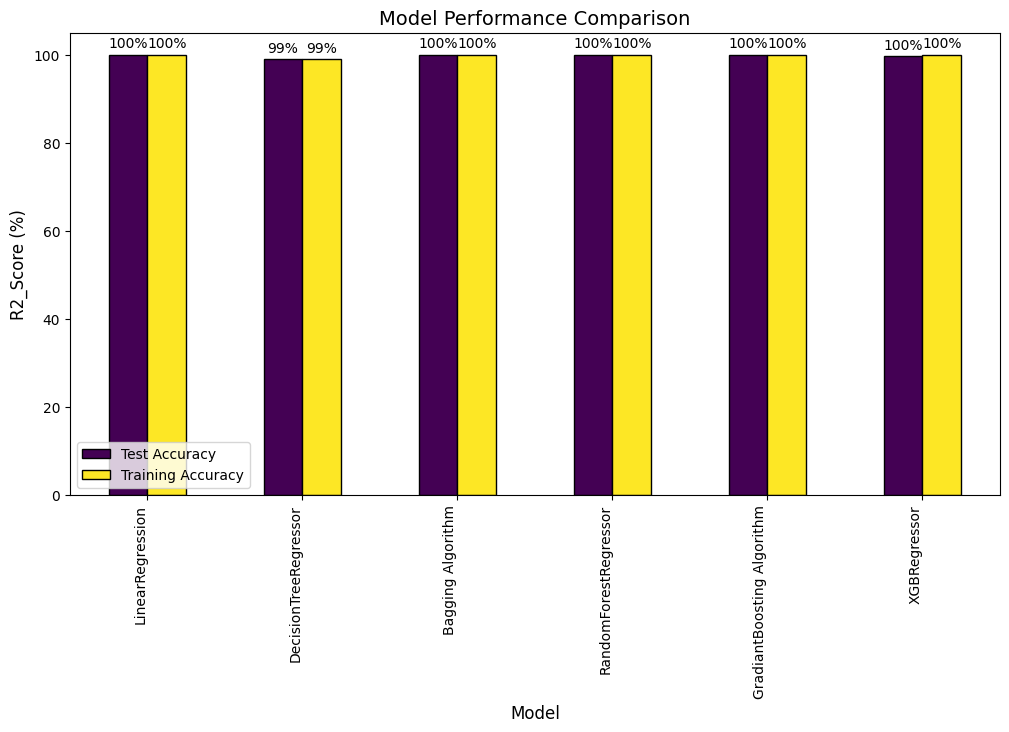

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame
score = pd.DataFrame({
    "Model": ["LinearRegression","DecisionTreeRegressor","Bagging Algorithm","RandomForestRegressor","GradiantBoosting Algorithm","XGBRegressor"],
    "R2_Score": [a1*100, a2*100, a3*100, a4*100, a5*100, a6*100],
    "Trainig_R2_Score": [t1*100, t2*100, t3*100, t4*100, t5*100, t6*100]
})

# Set figure size
plt.figure(figsize=(12, 6))

# Plot bar chart
ax = score.plot(x="Model", kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")

# Customize the plot
plt.title("Model Performance Comparison", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R2_Score (%)", fontsize=12)
plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels for better visibility
plt.legend(["Test Accuracy", "Training Accuracy"], fontsize=10)

# Display values on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.f%%", fontsize=10, padding=3)

# Show plot
plt.show()

**Conclusion**

* High Model Accuracy: All models achieved 98.93% to 100% R², indicating strong predictive power.

* Possible Overfitting: Linear Regression (100%) and other models with near-perfect scores may indicate overfitting or data leakage.

* Ensemble Models Perform Best: Bagging, Random Forest, and Gradient Boosting showed superior generalization with minimal overfitting.

* Need for Hyperparameter Tuning: XGBoost (99.66%) performed slightly lower, suggesting further tuning can improve results.

* Validation is Crucial: Despite high accuracy, models should be tested with cross-validation and real-world unseen data to ensure reliability.

## Model Save

* Saving a machine learning model using a .pkl (Pickle) file allows you to store and reuse the trained model without retraining it each time, making it ideal for deployment and sharing. This approach is widely used because it enables fast serialization and deserialization, ensuring quick loading and prediction. The process involves training a model, such as a RandomForestClassifier, and then using pickle.dump() to save it as a .pkl file. Later, the saved model can be reloaded using pickle.load() and used for predictions on new data. Alternatively, for larger models like XGBoost or RandomForest, joblib is preferred as it provides better efficiency and supports compression. This method is highly beneficial in real-world applications such as deploying models in Streamlit, Flask, or FastAPI, where rapid inference without retraining is required. If you need guidance on deploying your .pkl model, I can help you set it up.

In [275]:
import pickle
with open("Taxes.pkl","wb") as f:
    pickle.dump(rm,f)

In [276]:
with open("Taxes.pkl","rb") as f:
    file = pickle.load(f)

In [277]:
file

RandomForestRegressor()

In [278]:
x_train

,AGENCY NAME,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,Day,Month,Year
85035,91,858,3,1,0,0.0,40.0,9783.00,8,4,2013
113180,88,293,5,1,0,0.0,40.0,3629.45,26,8,2013
149224,98,98,5,1,0,0.0,40.0,4908.09,1,7,2018
37829,40,1304,5,0,0,0.0,40.0,3774.96,10,5,2018
131078,88,292,5,0,0,0.0,40.0,3284.27,24,9,2018
...,...,...,...,...,...,...,...,...,...,...,...
41993,40,1008,2,0,0,0.0,40.0,3778.59,1,9,2016
97639,90,326,3,1,1,0.0,20.0,1325.00,1,2,2020
95939,91,463,3,1,0,0.0,40.0,2900.00,22,1,2019
117952,88,76,3,1,0,0.0,40.0,3374.68,8,8,2013


In [279]:
y_train

85035     117396.00
113180     43553.40
149224     58897.08
37829      45299.52
131078     39411.24
            ...    
41993      45343.08
97639      15900.00
95939      34800.00
117952     40496.16
43567      27754.08
Name: ANNUAL, Length: 112110, dtype: float64

In [281]:
file.predict([[91,	858,	3,	1	,0,	0.0	,40.0,	9783.00	,8,	4,	2013]])

array([117395.952])

In [282]:
file.predict([[40,	394	,3,	1,	0,	0.0,	40.0,	2312.84,	1	,4,	2020]])

array([27754.08])

## Challenges Faced During the Project

**Large Data –** Handling high-volume data increased processing time and memory usage.

**Exploratory Data Analysis (EDA) –** Required deep analysis to identify patterns, trends, and relationships.

**Null Values –** Missing data in critical features affected model accuracy and reliability.

**Outliers –** Extreme values distorted statistical analysis and model predictions.

**Many Categorical Features –** Increased complexity and required proper encoding for model compatibility.

**Feature Selection –** Identifying the most relevant features was challenging due to high dimensionality.

**Overfitting –** Model performed well on training data but showed reduced generalization on test data.

<div style="text-align: center;">
    <b style="font-size: 30px;">Thank you</b>
</div>